In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df = pd.read_csv('final_merged.csv')

df.isnull().sum()

Date                      0
Symbol                    0
Series_x                  0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume    10298
%Deliverble           10298
Company Name              0
Industry                  0
dtype: int64

In [3]:
df.head()

,Date,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Company Name,Industry
0,03-01-2000,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.00,756.90,741.01,7512,5.566490e+11,NaN,NaN,Britannia Industries Ltd.,CONSUMER GOODS
1,03-01-2000,ITC,EQ,656.00,694.0,708.50,675.0,708.50,708.50,701.81,562715,3.949170e+13,NaN,NaN,ITC Ltd.,CONSUMER GOODS
2,03-01-2000,GRASIM,EQ,405.80,429.9,438.30,425.0,438.30,438.30,432.24,101578,4.390620e+12,NaN,NaN,Grasim Industries Ltd.,CEMENT & CEMENT PRODUCTS
3,03-01-2000,RELIANCE,EQ,233.05,237.5,251.70,237.5,251.70,251.70,249.37,4456424,1.111320e+14,NaN,NaN,Reliance Industries Ltd.,ENERGY
4,03-01-2000,M&M,EQ,419.75,453.3,453.35,448.9,453.35,453.35,453.18,67195,3.045170e+12,NaN,NaN,Mahindra & Mahindra Ltd.,AUTOMOBILE


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [5]:
df.head()

,Date,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Company Name,Industry
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.00,756.90,741.01,7512,5.566490e+11,NaN,NaN,Britannia Industries Ltd.,CONSUMER GOODS
1,2000-01-03,ITC,EQ,656.00,694.0,708.50,675.0,708.50,708.50,701.81,562715,3.949170e+13,NaN,NaN,ITC Ltd.,CONSUMER GOODS
2,2000-01-03,GRASIM,EQ,405.80,429.9,438.30,425.0,438.30,438.30,432.24,101578,4.390620e+12,NaN,NaN,Grasim Industries Ltd.,CEMENT & CEMENT PRODUCTS
3,2000-01-03,RELIANCE,EQ,233.05,237.5,251.70,237.5,251.70,251.70,249.37,4456424,1.111320e+14,NaN,NaN,Reliance Industries Ltd.,ENERGY
4,2000-01-03,M&M,EQ,419.75,453.3,453.35,448.9,453.35,453.35,453.18,67195,3.045170e+12,NaN,NaN,Mahindra & Mahindra Ltd.,AUTOMOBILE


In [6]:
X = df[['Prev Close','Date']].values
y = df[['Close']].values


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
print(X_train)

[[703.25 Timestamp('2000-01-03 00:00:00')]
 [656.0 Timestamp('2000-01-03 00:00:00')]
 [405.8 Timestamp('2000-01-03 00:00:00')]
 ...
 [319.45 Timestamp('2017-11-24 00:00:00')]
 [3288.3 Timestamp('2017-11-27 00:00:00')]
 [1218.5 Timestamp('2017-11-27 00:00:00')]]


In [9]:
print(X_test)

[[4742.0 Timestamp('2017-11-27 00:00:00')]
 [260.75 Timestamp('2017-11-27 00:00:00')]
 [1201.6 Timestamp('2017-11-27 00:00:00')]
 ...
 [419.55 Timestamp('2021-04-30 00:00:00')]
 [103.05 Timestamp('2021-04-30 00:00:00')]
 [621.45 Timestamp('2021-04-30 00:00:00')]]


In [10]:
X_df = pd.DataFrame(X_train, columns=[['Prev Close','Date']])
y_df = pd.DataFrame(y_train, columns=['Close'])

In [11]:
print(X_df['Prev Close'])

       Prev Close
0          703.25
1           656.0
2           405.8
3          233.05
4          419.75
...           ...
159222     505.15
159223      180.4
159224     319.45
159225     3288.3
159226     1218.5

[159227 rows x 1 columns]


In [12]:
regressor=LinearRegression()
regressor.fit(X_df[['Prev Close']],y_train)

LinearRegression()

In [13]:
Xtest_df = pd.DataFrame(X_test, columns=[['Prev Close','Date']])

In [14]:
y_pred=regressor.predict(Xtest_df[['Prev Close']])

In [15]:
Xtest_df = pd.DataFrame(X_test, columns=[['Prev Close','Date']])
y_preddf = pd.DataFrame(y_pred,columns=['Close'])
y_testdf = pd.DataFrame(y_test,columns=['Close'])

In [16]:
r2_score(y_test,y_pred)

0.9989838393211664

In [17]:
print(Xtest_df)

      Prev Close       Date
0         4742.0 2017-11-27
1         260.75 2017-11-27
2         1201.6 2017-11-27
3        1009.55 2017-11-27
4          305.9 2017-11-27
...          ...        ...
39802     2462.9 2021-04-30
39803    2613.45 2021-04-30
39804     419.55 2021-04-30
39805     103.05 2021-04-30
39806     621.45 2021-04-30

[39807 rows x 2 columns]


In [18]:
print(y_test)

[[4796.9 ]
 [ 259.25]
 [1194.7 ]
 ...
 [ 421.8 ]
 [ 102.45]
 [ 600.5 ]]


In [19]:
print(y_pred)

[[4744.65040136]
 [ 260.82467471]
 [1202.21545517]
 ...
 [ 419.71594956]
 [ 103.03403212]
 [ 621.73199736]]


In [20]:
print(Xtest_df)

      Prev Close       Date
0         4742.0 2017-11-27
1         260.75 2017-11-27
2         1201.6 2017-11-27
3        1009.55 2017-11-27
4          305.9 2017-11-27
...          ...        ...
39802     2462.9 2021-04-30
39803    2613.45 2021-04-30
39804     419.55 2021-04-30
39805     103.05 2021-04-30
39806     621.45 2021-04-30

[39807 rows x 2 columns]


In [21]:
X_plot = Xtest_df.iloc[:,-1:]
X_plotdf = pd.DataFrame(X_plot,columns = [('Date',)])

In [22]:
print(X_plotdf)

            Date
0     2017-11-27
1     2017-11-27
2     2017-11-27
3     2017-11-27
4     2017-11-27
...          ...
39802 2021-04-30
39803 2021-04-30
39804 2021-04-30
39805 2021-04-30
39806 2021-04-30

[39807 rows x 1 columns]


In [23]:

print(X_plotdf.shape)
print(y_testdf.shape)

(39807, 1)
(39807, 1)


In [24]:
new_df = pd.merge(X_plotdf, y_preddf, left_index=True, right_index=True)
old_df = pd.merge(X_plotdf, y_testdf, left_index=True, right_index=True)

In [25]:
new_df = new_df.rename(columns = {('Date',):'Date'})
old_df = old_df.rename(columns = {('Date',):'Date'})
new_df = new_df.rename(columns={('Close'):'Predicted Price'})
old_df = old_df.rename(columns={('Close'):'Actual Price'})

In [26]:
print(old_df)

            Date  Actual Price
0     2017-11-27       4796.90
1     2017-11-27        259.25
2     2017-11-27       1194.70
3     2017-11-27        998.75
4     2017-11-27        305.25
...          ...           ...
39802 2021-04-30       2421.65
39803 2021-04-30       2536.40
39804 2021-04-30        421.80
39805 2021-04-30        102.45
39806 2021-04-30        600.50

[39807 rows x 2 columns]


In [27]:
print(new_df)

            Date  Predicted Price
0     2017-11-27      4744.650401
1     2017-11-27       260.824675
2     2017-11-27      1202.215455
3     2017-11-27      1010.055069
4     2017-11-27       306.000626
...          ...              ...
39802 2021-04-30      2464.240423
39803 2021-04-30      2614.876956
39804 2021-04-30       419.715950
39805 2021-04-30       103.034032
39806 2021-04-30       621.731997

[39807 rows x 2 columns]


In [28]:
new_df.describe()

,Date,Predicted Price
count,39807,39807.000000
mean,2019-08-14 07:28:09.984173824,2407.151064
min,2017-11-27 00:00:00,59.959288
25%,2018-10-04 00:00:00,332.665944
50%,2019-08-14 00:00:00,787.627296
75%,2020-06-26 00:00:00,2196.586670
max,2021-04-30 00:00:00,31766.923304
std,NaN,4503.728553


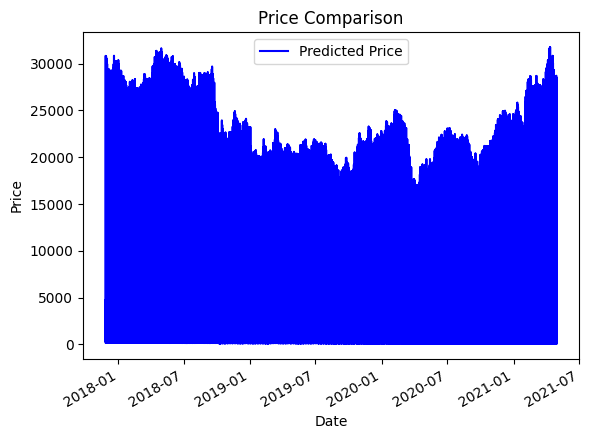

In [29]:
old_df.set_index('Date', inplace=True)
new_df.set_index('Date',inplace=True)
# ax = old_df.plot(color='red')
new_df.plot(color='blue')
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()